TODO:
 - Check for `` and "

In [23]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

/home/memesrized/.virtualenvs/edu/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Opusparcus

In [3]:
opus = pd.read_csv("data/opusparcus_en/en/en-train.txt", sep="\t",
                   header=None,
                  names=['id', 'sentence1', 'sentence2', "PMI_score", "score2", "score3", "edit_dist"])

In [10]:
pd.options.display.max_rows = 1000

In [13]:
opus.shape

(40653996, 7)

In [25]:
opus[(opus['edit_dist']>8) & (opus['score3']>3) & (opus['PMI_score']>50)][['sentence1', 'sentence2']].to_csv(
    "data/prepared_datasets/subs_splitted.csv"
)

<AxesSubplot:ylabel='Frequency'>

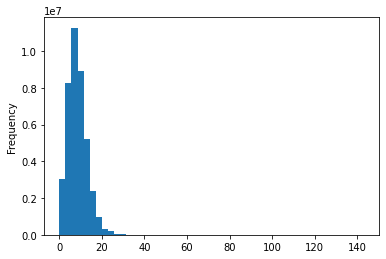

In [7]:
opus["edit_dist"].plot(kind="hist", bins=50)

<AxesSubplot:ylabel='Frequency'>

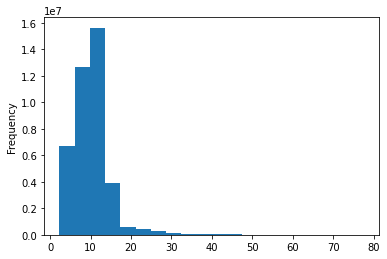

In [4]:
opus["PMI_score"].plot(kind="hist", bins=20)

# Parabank

In [1]:
import pandas as pd


In [16]:
df = pd.read_csv("data/parabank/parabank2.tsv", sep="\t", nrows=20000)

In [10]:
parabank = pd.read_csv("data/parabank/parabank.tsv", sep="\t")
parabank_ref = pd.read_csv("data/parabank/ref_parabank.tsv", sep="\t")

In [22]:
parabank.sort_values("human_score").drop_duplicates("ref_id")[["ref_id", 'candidate']].join(
    parabank_ref[['ref_id', 'ref_sent']], on="ref_id", rsuffix="1"
)[['candidate', 'ref_sent']].to_csv("data/parabank/parabank_test.csv")

<AxesSubplot:ylabel='Frequency'>

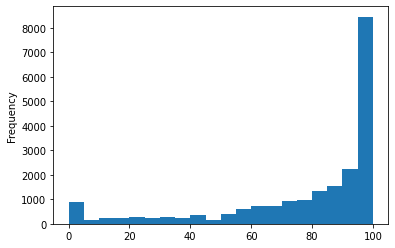

In [11]:
parabank['human_score'].plot(kind="hist", bins=20)

# Quora

In [4]:
quora = pd.read_csv("./data/quora_duplicate_questions.tsv", sep="\t", index_col=0)

In [11]:
quora[quora['is_duplicate'].map(bool)][['question1', 'question2']].rename(
    {"question1": "sentence1", "question2":"sentence2"}, axis=1).to_csv("data/prepared_datasets/quora_splitted.csv")

# Paws

In [12]:
from pathlib import Path

In [14]:
paws = pd.DataFrame()

for x in Path("data/paws/").rglob("*.tsv"):
    paws = paws.append(pd.read_csv(x, sep="\t"))
    
paws.loc[paws.label.isna(), 'label'] = 0
paws.loc[paws.noisy_label.isna(), 'noisy_label'] = 0
paws[['label', 'noisy_label']] = paws[['label', 'noisy_label']].applymap(bool)

In [26]:
paws[paws['label']][['sentence1', 'sentence2']].to_csv("data/prepared_datasets/paws.csv")

In [6]:
pd.read_csv("data/prepared_datasets/paws.csv")

,Unnamed: 0,sentence1,sentence2
0,14,"White House Farm ( Jefferson County , West Vir...","Jefferson County , West Virginia ( White House..."
1,35,"I lov 'd her soon , I lov 'd her late .","I lov 'd her late , I lov 'd her soon"
2,36,"Madhava Menon appoints his friend , DIG , Madh...","Madhava Menon appoints his friend , DIG , K. G..."
3,48,"The AVA includes about in Iredell , Wilkes and...","The AVA includes about in Yadkin , Wilkes and ..."
4,56,"Quintanar del Rey is a municipality in Spain ,...",Quintanar del Rey is a municipality in Cuenca ...
...,...,...,...
31829,7993,"In Advent , the traditional `` Tauberbischofsh...","During Advent , the traditional `` Tauberbisch..."
31830,7994,"In 2002 , the song was released by British pro...","In 2002 , the song was published by the Britis..."
31831,7995,"Tommy Connolly , who plays Rory Jennings , pla...","Tommy Connolly , who plays Rory Jennings , pla..."
31832,7996,"Monroe Meadows , in Yosemite valley near Brida...","Monroe Meadows , in Yosemite Valley near Brida..."


In [28]:
paws[paws['noisy_label']][['sentence1', 'sentence2']].to_csv("data/prepared_datasets/paws_noisy.csv")

# Microsoft Paraphrase Corpus

In [30]:
msr = []

with open("data/msr/msr_paraphrase_train.txt") as file:
    for line in file.readlines():
        msr.append(line.split("\t"))

with open("data/msr/msr_paraphrase_test.txt") as file:
    for line in list(file.readlines())[1:]:
        msr.append(line.split("\t"))
        
msr = pd.DataFrame(msr[1:], columns=msr[0])

In [31]:
len(msr)

5801

In [35]:
msr

,﻿Quality,#1 ID,#2 ID,#1 String,#2 String\n
0,1,702876,702977,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,1330381,1330521,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...
...,...,...,...,...,...
5796,0,2685984,2686122,"After Hughes refused to rehire Hernandez, he c...",Hernandez filed an Equal Employment Opportunit...
5797,0,339215,339172,There are 103 Democrats in the Assembly and 47...,Democrats dominate the Assembly while Republic...
5798,0,2996850,2996734,Bethany Hamilton remained in stable condition ...,"Bethany, who remained in stable condition afte..."
5799,1,2095781,2095812,"Last week the power station’s US owners, AES C...","The news comes after Drax's American owner, AE..."


In [40]:
msr

,label,id1,id2,sentence1,sentence2
0,1,702876,702977,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,1330381,1330521,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...
...,...,...,...,...,...
5796,0,2685984,2686122,"After Hughes refused to rehire Hernandez, he c...",Hernandez filed an Equal Employment Opportunit...
5797,0,339215,339172,There are 103 Democrats in the Assembly and 47...,Democrats dominate the Assembly while Republic...
5798,0,2996850,2996734,Bethany Hamilton remained in stable condition ...,"Bethany, who remained in stable condition afte..."
5799,1,2095781,2095812,"Last week the power station’s US owners, AES C...","The news comes after Drax's American owner, AE..."


In [39]:
msr[msr["label"].map(int).map(bool)]

,label,id1,id2,sentence1,sentence2
0,1,702876,702977,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
2,1,1330381,1330521,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...
5,1,738533,737951,Revenue in the first quarter of the year dropp...,With the scandal hanging over Stewart's compan...
7,1,579975,579810,The DVD-CCA then appealed to the state Supreme...,The DVD CCA appealed that decision to the U.S....
...,...,...,...,...,...
5792,1,1670781,1670669,Gehring waived extradition Monday during a hea...,Gehring waived extradition Monday during a hea...
5793,1,912454,912640,"""I am advised that certain allegations of crim...","""I am advised that certain allegations of crim..."
5795,1,1917207,1917187,"The deal, approved by both companies' board of...",The acquisition has been approved by both comp...
5799,1,2095781,2095812,"Last week the power station’s US owners, AES C...","The news comes after Drax's American owner, AE..."


In [37]:
msr.columns = ["label", "id1", 'id2', 'sentence1', "sentence2"]

In [81]:
pd.options.display.max_rows = 1000

In [85]:
msr[msr["label"].map(int).map(bool)][['sentence1', 'sentence2']].to_csv("data/prepared_datasets/mpc.csv")

In [41]:
pd.read_csv("data/prepared_datasets/mpc.csv")

,Unnamed: 0,sentence1,sentence2
0,0,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,2,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
2,4,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...
3,5,Revenue in the first quarter of the year dropp...,With the scandal hanging over Stewart's compan...
4,7,The DVD-CCA then appealed to the state Supreme...,The DVD CCA appealed that decision to the U.S....
...,...,...,...
3895,5792,Gehring waived extradition Monday during a hea...,Gehring waived extradition Monday during a hea...
3896,5793,"""I am advised that certain allegations of crim...","""I am advised that certain allegations of crim..."
3897,5795,"The deal, approved by both companies' board of...",The acquisition has been approved by both comp...
3898,5799,"Last week the power station’s US owners, AES C...","The news comes after Drax's American owner, AE..."


# Twitter

1. remove unintended dots
2. `& amp ;` -> `&`
3. `&squot;`-> '
3. count `"`
4.

In [61]:
import pandas as pd
import numpy as np
import json
import pickle
from tqdm.auto import tqdm

## LanguageNet

In [6]:
df = pd.read_csv("twitter/2016_Oct_10--2017_Jan_08_paraphrase.txt", sep="\t", names=["sentence1", 'sentence2'])

In [22]:
df = pd.read_csv("twitter/2016_Oct_10--2017_Jan_08_full.txt", sep="\t",  names=["score", "sentence1", 'sentence2'])

In [49]:
df = pd.read_csv("twitter/Twitter_URL_Corpus_train.txt", sep="\t", names=["sentence1", 'sentence2', 'score', 'url'])

In [54]:
df.iloc[110:120]

,sentence1,sentence2,score,url
110,"I would have to be a moron "" to say some citie...",the living dead vote Republican . For instance...,"(0,6)",https://t.co/QwED2YcMZ7
111,"I would have to be a moron "" to say some citie...",There are very few situations where Republican...,"(0,6)",https://t.co/QwED2YcMZ7
112,"I would have to be a moron "" to say some citie...",Giuliani tells @jaketapper I would have to be ...,"(4,6)",https://t.co/QwED2YcMZ7
113,"I would have to be a moron "" to say some citie...",Giuliani on rigged election Dead people genera...,"(0,6)",https://t.co/QwED2YcMZ7
114,"I would have to be a moron "" to say some citie...",Most dead people I know are undecided Rudy Giu...,"(0,6)",https://t.co/QwED2YcMZ7
115,"I would have to be a moron "" to say some citie...",I'm sure that there will be dead people voting...,"(1,6)",https://t.co/QwED2YcMZ7
116,"I would have to be a moron "" to say some citie...",Rudy Giuliani said dead people tend to vote De...,"(1,6)",https://t.co/QwED2YcMZ7
117,"I would have to be a moron "" to say some citie...",PROVE IT RUDY ! Giuliani on rigged election De...,"(0,6)",https://t.co/QwED2YcMZ7
118,"I would have to be a moron "" to say some citie...",Giuliani on rigged election: 'Dead people gene...,"(1,6)",https://t.co/QwED2YcMZ7
119,"I would have to be a moron "" to say some citie...",Top Donald Trump adviser Rudy Giuliani claimed...,"(1,6)",https://t.co/QwED2YcMZ7


In [59]:
for i in range(120, 130):
    print(df.iloc[i, 2])    
    print(df.iloc[i, 0])
    print(df.iloc[i, 1])   
    print("\n\n")

(0,6)
Teaching seventh graders in a " total mess " of an election season 
Guess who else can't wait for the election to be over ? 



(3,6)
Teaching seventh graders in a " total mess " of an election season 
What it's like trying to teach 7th-graders about an election involving Donald Trump 



(0,6)
Teaching seventh graders in a " total mess " of an election season 
I think if you repeat some stuff that Trump says , you could get sent down to the principal . Maybe even expelled . 



(0,6)
Teaching seventh graders in a " total mess " of an election season 
I think if you repeat some stuff that Trump says , you could get sent down to the principals office . 



(0,6)
Teaching seventh graders in a " total mess " of an election season 
Words matter in this election , and our students are listening 



(0,6)
Teaching seventh graders in a " total mess " of an election season 
One of the scariest things about this election season is realizing that kids are subjected to this garbage fire , t

In [40]:
i = 5

In [41]:
df['score'][i]

0.07301142680560001

In [42]:
df['sentence1'][i]

'Jeff Sessions fought to preserve Alabamas long history of separate and unequal education .'

In [43]:
df['sentence2'][i]

'Senator Sessions " accused a white attorney who supported voting rights of being a race traitor .'

## PIT

In [66]:
df = pd.read_csv("data/SemEval-PIT2015-github/data/train.data", 
                 sep="\t", names=['id_sentence1', 'theme', 'sentence1', 'sentence2', 'score', 'pos1', 'pos2'])

In [67]:
df

,id_sentence1,theme,sentence1,sentence2,score,pos1,pos2
0,4,1st QB,EJ Manuel the 1st QB to go in this draft,But my bro from the 757 EJ Manuel is the 1st Q...,"(5, 0)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,But/O/CC/O/O my/O/PRP$/B-NP/O bro/O/NN/I-NP/O ...
1,4,1st QB,EJ Manuel the 1st QB to go in this draft,Can believe EJ Manuel went as the 1st QB in th...,"(5, 0)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,Can/O/MD/B-VP/O believe/O/VB/I-VP/B-EVENT EJ/B...
2,4,1st QB,EJ Manuel the 1st QB to go in this draft,EJ MANUEL IS THE 1ST QB what,"(3, 2)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,EJ/B-person/NNP/B-NP/O MANUEL/I-person/NNP/I-N...
3,4,1st QB,EJ Manuel the 1st QB to go in this draft,EJ da 1st QB off da board,"(2, 3)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,EJ/O/NNP/B-NP/O da/O/DT/I-NP/O 1st/O/CD/I-NP/O...
4,4,1st QB,EJ Manuel the 1st QB to go in this draft,Manuel is the 1st QB to get drafted,"(4, 1)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,Manuel/B-person/NNP/B-NP/O is/O/VBZ/B-VP/O the...
...,...,...,...,...,...,...,...
13058,1891,iPhone 5,It fits the larger iPhone 5,My brother thirsty for this iPhone 5 so ill gu...,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,My/O/PRP$/B-NP/O brother/O/NN/I-NP/O thirsty/O...
13059,1891,iPhone 5,It fits the larger iPhone 5,Should I get the iPhone 5 or an Android,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,Should/O/UH/O/O I/O/PRP/B-NP/O get/O/VBP/B-VP/...
13060,1891,iPhone 5,It fits the larger iPhone 5,Somebody bring me an iPhone 5 charger to my work,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,Somebody/O/NN/B-NP/O bring/O/VB/B-VP/B-EVENT m...
13061,1891,iPhone 5,It fits the larger iPhone 5,Unlocked iPhone 5 300 hit me,"(0, 5)",It/O/PRP/B-NP/O fits/O/VBZ/B-VP/O the/O/DT/B-N...,Unlocked/O/NNP/B-NP/O iPhone/O/NNP/I-NP/O 5/O/...


In [72]:
df = df[df['score'].map(lambda x: int(x[1])>3)]

In [76]:
df.iloc[:100]

,id_sentence1,theme,sentence1,sentence2,score,pos1,pos2
0,4,1st QB,EJ Manuel the 1st QB to go in this draft,But my bro from the 757 EJ Manuel is the 1st Q...,"(5, 0)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,But/O/CC/O/O my/O/PRP$/B-NP/O bro/O/NN/I-NP/O ...
1,4,1st QB,EJ Manuel the 1st QB to go in this draft,Can believe EJ Manuel went as the 1st QB in th...,"(5, 0)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,Can/O/MD/B-VP/O believe/O/VB/I-VP/B-EVENT EJ/B...
4,4,1st QB,EJ Manuel the 1st QB to go in this draft,Manuel is the 1st QB to get drafted,"(4, 1)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,Manuel/B-person/NNP/B-NP/O is/O/VBZ/B-VP/O the...
5,4,1st QB,EJ Manuel the 1st QB to go in this draft,My boy EJ Manuel being the 1st QB picked,"(5, 0)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,My/O/PRP$/B-NP/O boy/O/NN/I-NP/O EJ/B-person/N...
6,4,1st QB,EJ Manuel the 1st QB to go in this draft,Not surprised EJ Manuel was 1st QB taken,"(5, 0)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,Not/O/RB/B-NP/O surprised/O/VBN/I-NP/B-EVENT E...
...,...,...,...,...,...,...,...
450,99,Anibal Sanchez,17 strikeouts tonight for Anibal Sanchez tonight,Anibal Sanchez has just set the club record fo...,"(5, 0)",17/O/LS/B-NP/O strikeouts/O/NN/I-NP/B-EVENT to...,Anibal/B-person/NNP/B-NP/O Sanchez/I-person/NN...
454,99,Anibal Sanchez,17 strikeouts tonight for Anibal Sanchez tonight,Anibal Sanchez sets the franchise record with ...,"(5, 0)",17/O/LS/B-NP/O strikeouts/O/NN/I-NP/B-EVENT to...,Anibal/B-person/NNP/B-NP/O Sanchez/I-person/NN...
456,99,Anibal Sanchez,17 strikeouts tonight for Anibal Sanchez tonight,How bout anibal Sanchez with 17 strikeouts,"(5, 0)",17/O/LS/B-NP/O strikeouts/O/NN/I-NP/B-EVENT to...,How/O/WRB/B-ADVP/O bout/O/RP/O/O anibal/B-pers...
459,99,Anibal Sanchez,17 strikeouts tonight for Anibal Sanchez tonight,Tigers 10 Braves 0 Anibal Sanchez strikes out ...,"(5, 0)",17/O/LS/B-NP/O strikeouts/O/NN/I-NP/B-EVENT to...,Tigers/B-other/NNP/B-NP/O 10/I-other/CD/I-NP/O...


In [77]:
for i, row in df[df['id_sentence1']==99].iterrows():
    print(row['score'])
    print(row['sentence1'])
    print(row['sentence2'])
    print("\n")

(4, 1)
Anibal Sanchez 17 strikeouts bad ass
Anibal Sanchez is a strikeout machine tonight


(4, 1)
Anibal Sanchez 17 strikeouts bad ass
Anibal Sanchez leaves the 8th inning with career high 17 Ks and franchise record


(4, 1)
Anibal Sanchez 17 strikeouts bad ass
anibal sanchez tigers record 17 Wow


(4, 1)
17 fucking strikeouts for Anibal Sanchez
Anibal Sanchez sets the franchise record with 17 Ks in a 9inning game


(4, 1)
17 fucking strikeouts for Anibal Sanchez
Anibal Sanchez struck out 17 in eight marvelous innings vs


(5, 0)
17 fucking strikeouts for Anibal Sanchez
Anibal Sanchez struck out 17 tonight


(4, 1)
17 fucking strikeouts for Anibal Sanchez
anibal Sanchez has 17 K s in 8 innings


(5, 0)
17 strikeouts tonight for Anibal Sanchez tonight
Anibal Sanchez has just set the club record for strikeouts in a game with 17


(5, 0)
17 strikeouts tonight for Anibal Sanchez tonight
Anibal Sanchez sets the franchise record with 17 Ks in a 9inning game


(5, 0)
17 strikeouts tonight fo

# Combine and final preparations 

In [2]:
quora = pd.read_csv("data/prepared_datasets/quora_splitted.csv", index_col=0)
#paws = pd.read_csv("data/prepared_datasets/paws.csv", index_col=0)
#paws_noisy = pd.read_csv("data/prepared_datasets/paws_noisy.csv", index_col=0)
mpc = pd.read_csv("data/prepared_datasets/mpc.csv", index_col=0)
subs = pd.read_csv("data/prepared_datasets/subs_splitted.csv", index_col=0)

### Make proper input

In [95]:
bos_token='<|startoftext|>'
eos_token='<|endoftext|>'
pad_token='<|pad|>'
sep_token='<|sep|>'

In [133]:
def make_input(sentence1, sentence2, bos='<|startoftext|>', 
               eos='<|endoftext|>', sep='<|sep|>'):
    return bos+sentence1.strip()+sep+sentence2.strip()+eos

In [135]:
make_input(*["fdsfsd  dsfs ", " fds sdaf safsf\n"])

'<|startoftext|>fdsfsd  dsfs<|sep|>fds sdaf safsf<|endoftext|>'

### Cut with length

In [98]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2', 
                                          bos_token='<|startoftext|>', 
                                          eos_token='<|endoftext|>', 
                                          pad_token='<|pad|>',
                                          sep_token='<|sep|>'
                                          )

In [99]:
def get_max_length(list_of_pairs):
    lens = []
    for x in tqdm_notebook(list_of_pairs):
        lens.append(len(tokenizer.encode(make_input(*x))))
    return lens

In [11]:
lens = get_max_length(mpc.to_numpy())
if len([x for x in lens if x<512]) < len(mpc):
    mpc.iloc[[x<512 for x in lens]].to_csv("data/prepared_datasets/mpc.csv")

In [13]:
lens = get_max_length(paws.to_numpy())
len([x for x in lens if x<512])

31834

In [14]:
lens = get_max_length(paws_noisy.to_numpy())
len([x for x in lens if x<512])

327826

In [15]:
lens = get_max_length(quora.to_numpy())
len([x for x in lens if x<512])

149263

In [75]:
paws.head()

,id,sentence1,sentence2,label,noisy_label
0,1,`` B. i. seychellarum '' is smaller and shorte...,`` B. i. seychellarum '' is smaller and shorte...,False,False
1,2,"Menna is a hamlet in the parish of Lanivet , E...","Menna is a hamlet in the parish of Ladock , Co...",False,False
2,3,The Liberal Party regained South Coast but los...,The Liberal Party lost South Coast but regaine...,False,False
3,4,The CD of 12 original Florida Style music cont...,The CD of 12 original Florida Style music cont...,False,False
4,5,"Unlike gravity or electrical forces , the nucl...","Unlike gravity or nuclear forces , the electri...",False,False


## Create final txts

### Pretraining

In [2]:
from pathlib import Path

In [7]:
list(Path("data/prepared_datasets/").glob("*.csv"))

[PosixPath('data/prepared_datasets/quora_splitted.csv'),
 PosixPath('data/prepared_datasets/mpc.csv'),
 PosixPath('data/prepared_datasets/paws.csv'),
 PosixPath('data/prepared_datasets/paws_noisy.csv')]

In [31]:
df = pd.DataFrame()

for x in Path("data/prepared_datasets/").glob("*.csv"):
    if "mpc" not in str(x):
        df = df.append(pd.read_csv(x)[['sentence1', 'sentence2']])

In [32]:
df

,sentence1,sentence2
0,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
1,How can I be a good geologist?,What should I do to be a great geologist?
2,How do I read and find my YouTube comments?,How can I see all my Youtube comments?
3,What can make Physics easy to learn?,How can you make physics easy to learn?
4,What was your first sexual experience like?,What was your first sexual experience?
...,...,...
327821,United States President Herbert Hoover lived i...,US President Herbert Hoover lived as a child i...
327822,"The motto is Norman , the timbered hall is Eli...","The motte is Norman , the timbered hall is Eli..."
327823,Maadhu observes the change in his regular acti...,Maadhu observes the change in his regular acti...
327824,"In January 2018 , Morse Brown endorsed the nom...","In January 2018 , Morse endorsed Brown for the..."


In [39]:
import numpy as np

In [52]:
final_df = [make_input(*x) for x in df.to_numpy()]
np.random.shuffle(final_df)
len_final_df = [len(tokenizer.encode(x)) for x in tqdm_notebook(final_df)]
print("All:",len(len_final_df))
print("less than 512: ",len([x for x in len_final_df if x<512]))


All: 508923
less than 512:  508923


In [54]:
final_df = np.array(final_df)

In [56]:
np.save("data/final_datasets/pretraining.npy", final_df)

### MPC

In [57]:
df = pd.read_csv("data/prepared_datasets/mpc.csv", index_col=0)

In [59]:
final_df = np.array([make_input(*x) for x in df.to_numpy()])
np.random.shuffle(final_df)
len_final_df = [len(tokenizer.encode(x)) for x in tqdm_notebook(final_df)]
print("All:",len(len_final_df))
print("less than 512: ",len([x for x in len_final_df if x<512]))


All: 5282
less than 512:  5282


In [60]:
np.save("data/final_datasets/finetuning.npy", final_df)

# Only nice paraphrases 

In [28]:
import pandas as pd
import numpy as np

In [29]:
quora = pd.read_csv("data/prepared_datasets/quora_splitted.csv", index_col=0)

In [26]:
quora_ = [make_input(*x, bos="<|endoftext|>", sep=":paraphrase:") for x in quora.sample(10000).to_numpy()]

In [30]:
mpc = pd.read_csv("data/prepared_datasets/mpc.csv", index_col=0)
mpc2 = mpc[['sentence2', 'sentence1']]
mpc2.columns = ['sentence1', 'sentence2']
mpc = mpc.append(mpc2)

In [28]:
mpc_ = [make_input(*x, bos="<|endoftext|>", sep=":paraphrase:") for x in mpc.to_numpy()]

In [31]:
subs = pd.read_csv("data/prepared_datasets/subs_splitted.csv", index_col=0)

subs2 = subs[['sentence2', 'sentence1']]
subs2.columns = ['sentence1', 'sentence2']

subs = subs.append(subs2)

In [22]:
subs_ = [make_input(*x, bos="<|endoftext|>", sep=":paraphrase:") for x in subs.to_numpy()]

In [23]:
len(subs_), len(mpc_), len(quora_)

(2304, 7800, 10000)

In [24]:
np.save("data/final_datasets/quora_mpc_cpm_20k.npy", np.array(quora_ + mpc_ + subs_))

### Tokenized 

In [26]:
import transformers

transformers.__version__

/home/memesrized/.virtualenvs/edu/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


'3.4.0'

In [70]:
#data = np.array(quora_ + mpc_ + subs_)
data = np.array([make_input(*x, bos="<|endoftext|>", sep=":paraphrase:") for x in dataset.to_numpy()])

In [71]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium', 
                                          pad_token='<|endoftext|>',
                                        #   bos_token='<|startoftext|>', 
                                        #   eos_token='<|endoftext|>', 
                                        #   pad_token='<|pad|>',
                                        #   sep_token='<|sep|>'
                                          )

/home/memesrized/.virtualenvs/edu/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [72]:
max_length = max([len(tokenizer.encode(x)) for x in data])

In [73]:
max_length

119

In [74]:
tokenizer.encode(":paraphrase:")

[25, 1845, 6570, 22789, 25]

In [75]:
tokenizer.encode("paraphrase")

[1845, 6570, 22789]

In [76]:
len(data)

15104

In [77]:
a = np.array([
    list(tokenizer(x,
              truncation=True, 
             max_length=max_length, 
             padding="max_length").values())
    for x in data
])

In [78]:
np.save("data/final_datasets/toxic_to_non-toxic_tokenized.npy", a)

# PPLM

## try

In [45]:
import json

In [20]:
js = pd.read_csv("data/jigsaw/jigsaw_toxic_augmented.csv")

In [34]:
js_par = js[['comment_text', 'paraphrase']]
js_par.columns = ['sentence1', 'sentence2']

In [39]:
js_par = [make_input(*x, bos="<|endoftext|>", sep=":paraphrase:") for x in js_par.to_numpy()]

In [48]:
df = []
df.extend([{'text': x, 'label': 0} for x in js_par])

In [49]:
df.extend([{'text': x, 'label': 1} for x in mpc_[:2500]])

In [51]:
df[-1]

{'text': '<|endoftext|>An 18-month run for it in Toronto was originally planned as part of a North American tour.:paraphrase:When we opened here, we originally planned an 18-month run as a part of a North American tour.\n<|endoftext|>',
 'label': 1}

In [53]:
with open("data/train_discrim.jsonl", 'w') as file:
    for x in df:
        file.write(json.dumps(x))
        file.write("\n")

In [55]:
chr(347)

'ś'

In [5]:
import json
with open("PPLM/paper_code/data/train_discrim.jsonl", 'r') as file:
    with open("PPLM/paper_code/data/train_discrim_unidecode.jsonl", 'w') as file_out:
        for x in [json.loads(x) for x in file.readlines()]:
            file_out.write(json.dumps({"text": unidecode(x['text']), 'label': x['label']}))
            file_out.write("\n")

In [1]:
from unidecode import unidecode

In [3]:
unidecode(chr(347))

's'

### Toxicity reduction by paraphrase

In [10]:
with open("data/bad-words.txt") as file:
    bad = [x.strip() for x in file.readlines() if len(x.strip()) > 3]

In [19]:
bad[::-1]

['zipperhead',
 'zigabo',
 'yellowman',
 'yankee',
 'wuzzie',
 'wuss',
 "women's",
 'willy',
 'williewanker',
 'willie',
 'wigger',
 'whorehouse',
 'whorefucker',
 'whore',
 'whop',
 'whiz',
 'whitey',
 'whitetrash',
 'whites',
 'whitenigger',
 'whit',
 'whiskydick',
 'whiskeydick',
 'whiskey',
 'whigger',
 'whash',
 'whacker',
 'wetspot',
 'wetback',
 'wetb',
 'welfare',
 'welcher',
 'weewee',
 'weenie',
 'weapon',
 'waysted',
 'wanking',
 'wanker',
 'wank',
 'vulva',
 'vomit',
 'virginbreaker',
 'virgin',
 'violence',
 'vietcong',
 'vibrator',
 'vibrater',
 'vibr',
 'vatican',
 'vaginal',
 'vagina',
 'uterus',
 'usama',
 'urine',
 'urinate',
 'urinary',
 'upthebutt',
 'uptheass',
 'upskirt',
 'unfuckable',
 'twobitwhore',
 'twinkie',
 'twink',
 'twat',
 'turnon',
 'turd',
 'tunneloflove',
 'tuckahoe',
 'trots',
 'trojan',
 'trisexual',
 'triplex',
 'transvestite',
 'transsexual',
 'transexual',
 'tranny',
 'trannie',
 'tramp',
 'trailertrash',
 'towelhead',
 'tosser',
 'torture',
 't

In [18]:
[x for x in bad if "mother" in x]

['motherfuck',
 'motherfucked',
 'motherfucker',
 'motherfuckin',
 'motherfucking',
 'motherfuckings',
 'motherlovebone']

In [40]:
bad_set = list(set([x for x in bad if ("ass" in x) and ("assassin" not in x)]
+[x for x in bad if "fuck" in x]
+[x for x in bad if "suck" in x]
+[x for x in bad if "butt" in x]
+[x for x in bad if "cock" in x]
+[x for x in bad if "cum" in x]
+[x for x in bad if "dick" in x]
+[x for x in bad if "fag" in x]
+[x for x in bad if "damn" in x]
+[x for x in bad if "nigg" in x]
+[x for x in bad if "nige" in x]
+[x for x in bad if "slut" in x]
+[x for x in bad if "fat" in x]))

In [26]:
with open("data/bad_set.txt", 'w') as file:
    for x in list(bad_set):
        file.write(x)
        file.write("\n")

In [34]:
dataset = quora.sample(5000).append(mpc).append(subs)

In [35]:
import numpy as np

In [38]:
a = [1,2,3]
a.insert(1,9)
a

[1, 9, 2, 3]

In [56]:
def augment(text):
    splitted = text.split()
    bad = np.random.choice(np.array(bad_set), max(1, int(len(splitted)/5)))
    for x in bad:
        index = np.random.randint(len(splitted))
        splitted.insert(index, x)
    return " ".join(splitted)

In [60]:
dataset['sentence1'] = dataset['sentence1'].progress_map(augment)

In [61]:
dataset

,sentence1,sentence2
139341,What does a hard disk drive do in unfuckable a...,What is the function of the hard disc drive in...
385343,"What is cocklicker the oldest book in history,...",Which is the oldest written book in the histor...
284800,How much time niggard's it takes to complete CA?,How much time does it take for an average stud...
7584,How cockrider can I gain weight naturally?,Doing excessive masturbation is a cause of les...
70823,What are cuntsucker some remarkable facts abou...,What are some intresting facts about sweden?
...,...,...
24256,Have you got any assjockey kids ?,Do you have any children ?
24260,He got what was nigerians coming to him .,He got what he deserved .
24261,asslick You look fabulous .,Don 't you look stunning .
24276,fuckable I haven 't finished .,I 'm not done .


In [62]:
dataset.to_csv("data/prepared_datasets/toxic_to_non-toxic.csv")

In [66]:
np.save("data/final_datasets/toxic_to_non-toxic.npy", np.array([make_input(*x, bos="<|endoftext|>", sep=":paraphrase:") for x in dataset.to_numpy()]))

In [ ]:
np.array([make_input(*x, bos="<|endoftext|>", sep=":paraphrase:") for x in dataset.to_numpy()])

In [69]:
len(np.array([make_input(*x, bos="<|endoftext|>", sep=":paraphrase:") for x in dataset.to_numpy()]))

15104

In [24]:
len(bad_set)

266

## PPLM last try

In [44]:
js = pd.read_csv("data/pplm/jigsaw_top10_paraphrased_GPT_metrics.csv", index_col=0)

In [75]:
mrpc = pd.read_csv("data/pplm/mrpc_metrics.csv", index_col=0)

In [76]:
mrpc

,sentence1,best,use_best,bleu_best,rouge_best
0,"Amrozi accused his brother, whom he called ""th...","He accused his brother, whom he called ""the wi...",0.880791,0.942615,0.960000
2,They had published an advertisement on the Int...,They had published an advertisement on the Int...,0.954609,0.908655,0.937500
4,"The stock rose $2.11, or about 11 percent, to ...","The stock rose $2.11, or about 11 percent, to ...",0.944924,1.000000,1.000000
5,Revenue in the first quarter of the year dropp...,"In the first quarter of the year, revenue in t...",0.848032,0.569648,0.764706
7,The DVD-CCA then appealed to the state Supreme...,The DVD-CCA also appealed to the state Supreme...,0.700537,0.707107,0.875000
...,...,...,...,...,...
5792,Gehring waived extradition Monday during a hea...,He waived extradition Monday during a hearing ...,0.932359,0.759084,0.857143
5793,"""I am advised that certain allegations of crim...",I'm advised that certain allegations of crimin...,0.864818,0.609142,0.722222
5795,"The deal, approved by both companies' board of...",The acquisition is expected to be completed in...,0.846271,0.523698,0.685714
5799,"Last week the power station’s US owners, AES C...","Last week the power station’s US owners, AES C...",0.977250,1.000000,1.000000


In [78]:
non_tox = mrpc[['sentence1', 'best']]

In [59]:
import numpy as np
from tqdm.auto import tqdm

tqdm.pandas()

def reranking(row):
    i = [x for x in row.keys() if ("use_" in str(x)) and row[x]>0.7 ]
    i = i or [x[0] for x in sorted(filter(lambda x: "use_" in str(x[0]) ,row.items()), key=lambda x: x[1], reverse=True)[:3]]
    #print(i)
    return [x[-1] for x in i]

def lowest_tox(cols, row):
    return int(cols[np.argmax([row['tox_original_'+col] for col in cols])])

js['best_i'] = js.progress_apply(lambda row: lowest_tox(reranking(row), row), axis=1)
js['best'] = js.progress_apply(lambda row: row[lowest_tox(reranking(row), row)], axis=1)

/home/memesrized/.virtualenvs/edu/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  pandas.core.


In [77]:
tox = js[(js.apply(lambda row: row["use_" + str(row['best_i'])], axis=1)>0.7) & (js.apply(lambda row: row["tox_original_" + str(row['best_i'])], axis=1) > 0.7)][['comment_text', 'best']]

In [84]:
tox.columns = ['sentence1', 'sentence2']
non_tox.columns = ['sentence1', 'sentence2']

In [86]:
tox['label'] = 0
non_tox['label'] = 1

<ipython-input-86-6490d67bfe6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_tox['label'] = 1


In [136]:
ds = tox.append(non_tox)

In [137]:
ds = ds[['label', 'sentence1', 'sentence2']]

In [138]:
ds = ds.sample(frac=1)

In [139]:
ds['length'] = get_max_length(ds[['sentence1', 'sentence2']].to_numpy())

In [140]:
ds = ds[ds['length']<512]

In [141]:
ds

,label,sentence1,sentence2,length
2824,1,"Evacuation went smoothly, although passengers ...","No evacuation went smoothly, although passenge...",39
3705,0,Go fuckin' hang yourself! Fuckin' scum of the ...,"Fuck you, asshole!",27
3284,0,You can add more of your orders below. What a ...,You can add more of your order below. What a p...,53
4939,0,Your Stupid Comments POV is a point of view. W...,How many stupid comments can an administrator ...,53
5431,0,Whose side are you on Brian? You dumbass mothe...,"['Who would you vote for?', 'Which side are yo...",197
...,...,...,...,...
3767,0,"Blow me, asshole.",Fuck me right from the start.,16
2583,1,"They varied greatly, ranging from one per cent...","The FTC said it varied greatly, ranging from o...",59
873,0,How in the hell is pointing out the fact that ...,"He's a racist, vandalises my stuff, and then g...",70
4712,0,I noticed you post a lot about taking dumps in...,Have you ever taken a dump in the wrong position?,80


In [142]:
ds['input'] = [
    make_input(*x, bos="<|endoftext|>", sep=":paraphrase:")
    for x in ds[['sentence1', 'sentence2']].to_numpy()
]

In [143]:
ds = ds[['label', 'input']]
ds.columns = ['label', 'text']

In [144]:
from unidecode import unidecode

ds['text'] = ds['text'].map(unidecode)

<ipython-input-144-b297bd51547c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['text'] = ds['text'].map(unidecode)


In [145]:
ds

,label,text
2824,1,"<|endoftext|>Evacuation went smoothly, althoug..."
3705,0,<|endoftext|>Go fuckin' hang yourself! Fuckin'...
3284,0,<|endoftext|>You can add more of your orders b...
4939,0,<|endoftext|>Your Stupid Comments POV is a poi...
5431,0,<|endoftext|>Whose side are you on Brian? You ...
...,...,...
3767,0,"<|endoftext|>Blow me, asshole.:paraphrase:Fuck..."
2583,1,"<|endoftext|>They varied greatly, ranging from..."
873,0,<|endoftext|>How in the hell is pointing out t...
4712,0,<|endoftext|>I noticed you post a lot about ta...


In [146]:
import json
with open("data/pplm/DISCRIM_TRAIN_DATASET.jsonl", 'w') as file:
    for i, row in ds.iterrows():
        file.write(json.dumps({"label": row['label'], 'text': row['text']}))
        file.write("\n")

In [147]:
ds[['text', 'label']].to_csv("GeDi/data/train.tsv", index=False, sep="\t")